# Example of use of the dataset for clustering

In [1]:
# Import Lib
from utils_punchdataset import loader
import pandas as pd
import numpy as np
import pycaret
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import cv2

## Load dataset

In [ ]:
base_path="punch_dataset"

In [ ]:
path = os.path.join("punch_dataset","LookUp.csv")
data=loader.punch_data(path)

In [4]:
data.data.head()

,Stroke,Thickness,Sensors,Image,Labels
0,5852,500.768070,Sensors\5852.csv,Images\5852.jpg,initial_wear
1,5865,501.223980,Sensors\5865.csv,Images\5865.jpg,initial_wear
2,5878,500.560970,Sensors\5878.csv,Images\5878.jpg,initial_wear
3,5893,500.881175,Sensors\5893.csv,Images\5893.jpg,initial_wear
4,5904,500.702215,Sensors\5904.csv,Images\5904.jpg,initial_wear


## Preprocessing of data (PCA)

### PCA Images

In [5]:
img=[]
for impath in data.data['Image']:
    #print(base_path,impath.replace('Images\\','Images/'))
    im = cv2.imread(os.path.join(base_path,impath.replace('Images\\','Images/')),0)
    d = cv2.resize(im, (256,256))
    img.append((d/255).flatten())
    

In [6]:
#IM gonna be data
pca_test_im = PCA(n_components=2500)  #
pca_test_im.fit(np.nan_to_num(img))
pca_sum_im = np.cumsum(pca_test_im.explained_variance_ratio_)
index_99_im = pca_sum_im < 0.90
val_im, counts_im = np.unique(index_99_im,return_counts=True)
pca_im = PCA(n_components=counts_im[1])

In [7]:
test=normalize(np.nan_to_num(img))
test

array([[0.00135096, 0.00135096, 0.00130093, ..., 0.00050036, 0.00050036,
        0.00050036],
       [0.00143   , 0.00143   , 0.00143   , ..., 0.00047667, 0.00047667,
        0.00047667],
       [0.00125544, 0.00125544, 0.00120894, ..., 0.00051148, 0.00046498,
        0.00046498],
       ...,
       [0.00023095, 0.        , 0.00023095, ..., 0.00138568, 0.00161663,
        0.00161663],
       [0.00023622, 0.        , 0.00023622, ..., 0.00188977, 0.00212599,
        0.00188977],
       [0.00022507, 0.        , 0.00045015, ..., 0.00157552, 0.00180059,
        0.00180059]])

In [8]:
data_im=pca_im.fit_transform(test)


In [ ]:
data_im

In [10]:
columns_im = [('imPCA_' + str(x)) for x in range(0, data_im.shape[1])]

In [11]:
pdImg = pd.DataFrame(data_im, columns=columns_im)
pdImg.head()

,imPCA_0,imPCA_1,imPCA_2,imPCA_3,imPCA_4,imPCA_5,imPCA_6,imPCA_7,imPCA_8,imPCA_9,...,imPCA_2266,imPCA_2267,imPCA_2268,imPCA_2269,imPCA_2270,imPCA_2271,imPCA_2272,imPCA_2273,imPCA_2274,imPCA_2275
0,-0.004488,-0.197561,-0.061269,0.129900,0.107365,0.109984,0.091244,0.020775,-0.134203,-0.042722,...,0.000332,-0.001163,-0.001548,-0.000366,0.004880,0.001548,0.001220,-0.001457,0.001238,0.000672
1,-0.018273,-0.198504,-0.067554,0.120019,0.091014,0.092018,0.056772,0.013780,-0.118825,-0.051497,...,-0.001237,-0.001966,-0.005722,-0.000082,0.000070,-0.000052,0.001107,-0.004158,0.001948,-0.001989
2,0.038460,-0.212005,-0.083844,0.130644,0.104344,0.077435,0.045894,0.017238,-0.101193,-0.068388,...,0.002178,-0.001769,-0.002108,-0.002147,0.001677,0.003059,-0.000322,0.000095,-0.000363,0.001794
3,0.010236,-0.202251,-0.074174,0.128452,0.120660,0.083399,0.067984,0.015373,-0.115707,-0.060309,...,0.003733,-0.000108,0.002974,-0.002032,0.002960,-0.001320,0.000215,-0.000003,-0.003667,0.000613
4,-0.008875,-0.197755,-0.077624,0.146661,0.097020,0.096429,0.086367,0.025290,-0.133745,-0.039472,...,0.000370,-0.000958,-0.000996,-0.004743,0.001695,0.001046,-0.002642,-0.000770,0.001797,0.003332


### PCA Force

In [12]:
force=[]
for senspath in data.data['Sensors']:
    i_forces= pd.read_csv((os.path.join(base_path,senspath.replace('Sensors\\','Sensors/'))))
    i_forces.head()
    force.append(i_forces['Force'])

In [13]:
#f gonna be data
pca_test_f = PCA(n_components=500)  #
pca_test_f.fit(np.nan_to_num(force))
pca_sum_f = np.cumsum(pca_test_f.explained_variance_ratio_)
index_99_f = pca_sum_f < 0.99
val_f, counts_f = np.unique(index_99_f,return_counts=True)
pca_f = PCA(n_components=counts_f[1])

In [14]:
f = normalize(np.nan_to_num(force))
data_f=pca_f.fit_transform(f)

In [15]:
columns_f = [('fPCA_' + str(x)) for x in range(0, data_f.shape[1])]

In [16]:
pdF = pd.DataFrame(data_f, columns=columns_f)
pdF.head()

,fPCA_0,fPCA_1,fPCA_2,fPCA_3,fPCA_4,fPCA_5,fPCA_6,fPCA_7,fPCA_8,fPCA_9,...,fPCA_16,fPCA_17,fPCA_18,fPCA_19,fPCA_20,fPCA_21,fPCA_22,fPCA_23,fPCA_24,fPCA_25
0,0.184603,0.629790,0.373524,0.214614,-0.146901,0.030226,-0.376724,0.471526,0.066537,-0.158226,...,-0.116350,-0.041513,0.110093,0.271977,-0.117340,-0.099525,0.021941,-0.029198,0.031317,-0.040110
1,0.203187,0.665758,0.389588,0.214777,-0.143222,0.018169,-0.201402,0.564990,0.244993,-0.109642,...,-0.085618,-0.123973,0.173414,0.129832,-0.052317,0.016459,-0.009366,-0.065131,0.051770,-0.045889
2,0.244043,0.647861,0.385535,0.269270,-0.217961,-0.263483,-0.219047,0.186349,0.001758,-0.209248,...,0.071018,0.166353,-0.345100,-0.054104,-0.035542,0.066210,0.023191,-0.065035,-0.099189,0.160662
3,0.203597,0.651576,0.357480,0.227118,-0.153812,-0.023741,-0.489204,0.224821,-0.226683,-0.257466,...,-0.021156,0.044441,-0.167679,0.185663,-0.152633,-0.083005,0.034690,-0.061967,-0.060735,0.067661
4,0.165354,0.619990,0.323889,0.216597,-0.201766,-0.178328,-0.425957,-0.056400,-0.359247,-0.119421,...,0.162986,-0.107313,-0.102704,-0.233310,-0.028511,0.134444,-0.051514,0.013304,0.070535,0.018731


### PCA AE

In [17]:
ae=[]
for senspath in data.data['Sensors']:
    i_ae= pd.read_csv((os.path.join(base_path,senspath.replace('Sensors\\','Sensors/'))))
    ae.append(i_ae['AE'])

In [18]:
#ae gonna be data
pca_test_ae = PCA(n_components=2500)  #
pca_test_ae.fit(np.nan_to_num(ae))
pca_sum_ae = np.cumsum(pca_test_ae.explained_variance_ratio_)
index_99_ae = pca_sum_ae < 0.99
val_ae, counts_ae = np.unique(index_99_ae,return_counts=True)
pca_ae = PCA(n_components=counts_ae[1])

In [19]:
ae = normalize(np.nan_to_num(ae))
data_ae=pca_f.fit_transform(ae)

In [20]:
columns_ae = [('aePCA_' + str(x)) for x in range(0, data_f.shape[1])]

In [21]:
pdAE = pd.DataFrame(data_ae, columns=columns_ae)
pdAE.head()

,aePCA_0,aePCA_1,aePCA_2,aePCA_3,aePCA_4,aePCA_5,aePCA_6,aePCA_7,aePCA_8,aePCA_9,...,aePCA_16,aePCA_17,aePCA_18,aePCA_19,aePCA_20,aePCA_21,aePCA_22,aePCA_23,aePCA_24,aePCA_25
0,0.060035,-0.022420,0.067061,-0.070733,-0.021882,0.030451,0.028352,-0.042763,0.097520,-0.121647,...,0.092504,-0.011372,-0.037019,-0.029493,0.018291,-0.080270,0.247956,-0.002871,0.089760,-0.091875
1,-0.084287,-0.230967,-0.032501,0.013838,0.077332,0.123272,0.186804,-0.014089,0.201163,-0.013786,...,0.060340,-0.028496,0.074226,-0.161631,0.014080,-0.082955,-0.071212,0.080770,0.113300,0.092875
2,-0.246348,0.190239,-0.127077,-0.300289,-0.017823,0.126511,0.084047,0.025384,-0.045631,-0.185150,...,0.130964,0.067615,-0.064105,-0.073781,0.051059,0.028354,0.193648,-0.052998,-0.017972,0.006360
3,0.152912,-0.063113,-0.050526,0.052616,0.196117,0.019275,0.113522,0.073390,-0.128152,0.095324,...,0.175299,0.108780,0.054194,-0.059120,0.002974,0.050352,-0.006618,0.185994,-0.078045,0.023007
4,-0.071005,-0.012224,-0.138409,-0.219173,0.132603,0.044618,-0.003226,0.115819,0.150497,-0.062907,...,0.228746,-0.020057,-0.079036,0.127016,0.215440,0.075507,0.099453,0.012456,-0.148835,0.006584


### Normalize Thickness

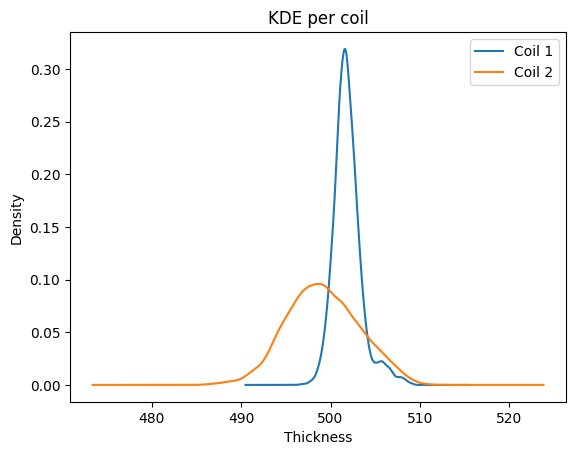

In [22]:
data.plot_kde_thickness(all=False,same=True)

In [23]:
from sklearn.preprocessing import StandardScaler
#####ENDE HIER
mask = data.data.Stroke < 78840
datacoil1 = data.data[mask]
mask = data.data.Stroke > 78840
datacoil2 = data.data[mask]
dickez1 = StandardScaler().fit_transform(datacoil1.Thickness.values.reshape(-1, 1))
dickez2 = StandardScaler().fit_transform(datacoil2.Thickness.values.reshape(-1, 1))
dickez = np.append(dickez1, dickez2)

pdThickness = pd.DataFrame(dickez, columns=['Thickness'])
pdThickness

,Thickness
0,-0.713241
1,-0.427972
2,-0.842826
3,-0.642470
4,-0.754447
...,...
11916,-1.634421
11917,-1.247385
11918,0.844310
11919,2.132090


### Join reduced DataFrame

In [24]:
pdData=pd.concat([pdThickness,pdImg,pdF,pdAE, data.data['Labels']], axis=1)
pdData

,Thickness,imPCA_0,imPCA_1,imPCA_2,imPCA_3,imPCA_4,imPCA_5,imPCA_6,imPCA_7,imPCA_8,...,aePCA_17,aePCA_18,aePCA_19,aePCA_20,aePCA_21,aePCA_22,aePCA_23,aePCA_24,aePCA_25,Labels
0,-0.713241,-0.004488,-0.197561,-0.061269,0.129900,0.107365,0.109984,0.091244,0.020775,-0.134203,...,-0.011372,-0.037019,-0.029493,0.018291,-0.080270,0.247956,-0.002871,0.089760,-0.091875,initial_wear
1,-0.427972,-0.018273,-0.198504,-0.067554,0.120019,0.091014,0.092018,0.056772,0.013780,-0.118825,...,-0.028496,0.074226,-0.161631,0.014080,-0.082955,-0.071212,0.080770,0.113300,0.092875,initial_wear
2,-0.842826,0.038460,-0.212005,-0.083844,0.130644,0.104344,0.077435,0.045894,0.017238,-0.101193,...,0.067615,-0.064105,-0.073781,0.051059,0.028354,0.193648,-0.052998,-0.017972,0.006360,initial_wear
3,-0.642470,0.010236,-0.202251,-0.074174,0.128452,0.120660,0.083399,0.067984,0.015373,-0.115707,...,0.108780,0.054194,-0.059120,0.002974,0.050352,-0.006618,0.185994,-0.078045,0.023007,initial_wear
4,-0.754447,-0.008875,-0.197755,-0.077624,0.146661,0.097020,0.096429,0.086367,0.025290,-0.133745,...,-0.020057,-0.079036,0.127016,0.215440,0.075507,0.099453,0.012456,-0.148835,0.006584,initial_wear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,-1.634421,-0.285714,0.554550,-0.036095,0.030653,-0.024926,0.063639,0.030260,-0.057035,0.016724,...,0.053924,-0.195134,-0.138685,-0.056316,-0.110244,0.097558,0.087498,0.051757,-0.297125,failure
11917,-1.247385,-0.262816,0.560487,-0.032346,0.051144,0.011234,0.103108,0.058391,-0.094204,0.024679,...,-0.033692,0.110176,0.121494,0.030480,0.120593,0.026144,-0.103068,0.027576,0.145755,failure
11918,0.844310,-0.263749,0.577356,-0.039941,0.065206,-0.021135,0.082840,0.008276,-0.066523,0.039033,...,-0.037781,-0.102934,-0.044555,-0.149603,0.033104,0.208956,-0.092419,-0.030590,-0.236323,failure
11919,2.132090,-0.237352,0.603674,-0.044318,0.032021,0.013681,0.073962,0.013267,-0.141989,0.032886,...,-0.001734,-0.151507,0.039554,0.206439,-0.072311,-0.020204,0.014382,-0.015336,-0.003421,failure


## Show Label Distribution

In [ ]:
import matplotlib.pyplot as plt
counts=pdData['Labels'].value_counts()
counts.plot(kind="bar")
plt.tight_layout()
plt.show()

Imbalenced, therefore F1-Score.

## Start PyCaret Experiment

In [25]:
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()
exp.setup(pdData,
            session_id = 123,
            use_gpu = True,
            log_experiment=False,
            log_plots=False,
            ignore_features = ['Stroke','Labels'])

,Description,Value
0,Session id,123
1,Original data shape,"(11921, 2330)"
2,Transformed data shape,"(11921, 2329)"
3,Ignore features,2
4,Numeric features,2329
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [29]:
kmeans = exp.create_model('kmeans')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:05:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1780,3200.5438,1.6177,0,0,0


In [34]:
# plot confusion matrix
kmeans_cluster = exp.assign_model(kmeans)
kmeans_cluster

,Thickness,imPCA_0,imPCA_1,imPCA_2,imPCA_3,imPCA_4,imPCA_5,imPCA_6,imPCA_7,imPCA_8,...,aePCA_17,aePCA_18,aePCA_19,aePCA_20,aePCA_21,aePCA_22,aePCA_23,aePCA_24,aePCA_25,Cluster
0,-0.713241,-0.004488,-0.197561,-0.061269,0.129900,0.107365,0.109984,0.091244,0.020775,-0.134203,...,-0.011372,-0.037019,-0.029493,0.018291,-0.080270,0.247956,-0.002871,0.089760,-0.091875,Cluster 0
1,-0.427972,-0.018273,-0.198504,-0.067554,0.120019,0.091014,0.092018,0.056772,0.013780,-0.118825,...,-0.028496,0.074226,-0.161631,0.014080,-0.082955,-0.071212,0.080770,0.113300,0.092875,Cluster 0
2,-0.842826,0.038460,-0.212005,-0.083844,0.130644,0.104344,0.077435,0.045894,0.017238,-0.101193,...,0.067615,-0.064105,-0.073781,0.051059,0.028354,0.193648,-0.052998,-0.017972,0.006360,Cluster 0
3,-0.642470,0.010236,-0.202251,-0.074174,0.128452,0.120660,0.083399,0.067984,0.015373,-0.115707,...,0.108780,0.054194,-0.059120,0.002974,0.050352,-0.006618,0.185994,-0.078045,0.023007,Cluster 0
4,-0.754447,-0.008875,-0.197755,-0.077624,0.146661,0.097020,0.096429,0.086367,0.025290,-0.133745,...,-0.020057,-0.079036,0.127016,0.215440,0.075507,0.099453,0.012456,-0.148835,0.006584,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,-1.634421,-0.285714,0.554550,-0.036095,0.030653,-0.024926,0.063639,0.030260,-0.057035,0.016724,...,0.053924,-0.195134,-0.138685,-0.056316,-0.110244,0.097558,0.087498,0.051757,-0.297125,Cluster 3
11917,-1.247385,-0.262816,0.560487,-0.032346,0.051144,0.011234,0.103108,0.058391,-0.094204,0.024679,...,-0.033692,0.110176,0.121494,0.030480,0.120593,0.026144,-0.103068,0.027576,0.145755,Cluster 3
11918,0.844310,-0.263749,0.577356,-0.039941,0.065206,-0.021135,0.082840,0.008276,-0.066523,0.039033,...,-0.037781,-0.102934,-0.044555,-0.149603,0.033104,0.208956,-0.092419,-0.030590,-0.236323,Cluster 2
11919,2.132090,-0.237352,0.603674,-0.044318,0.032021,0.013681,0.073962,0.013267,-0.141989,0.032886,...,-0.001734,-0.151507,0.039554,0.206439,-0.072311,-0.020204,0.014382,-0.015336,-0.003421,Cluster 2


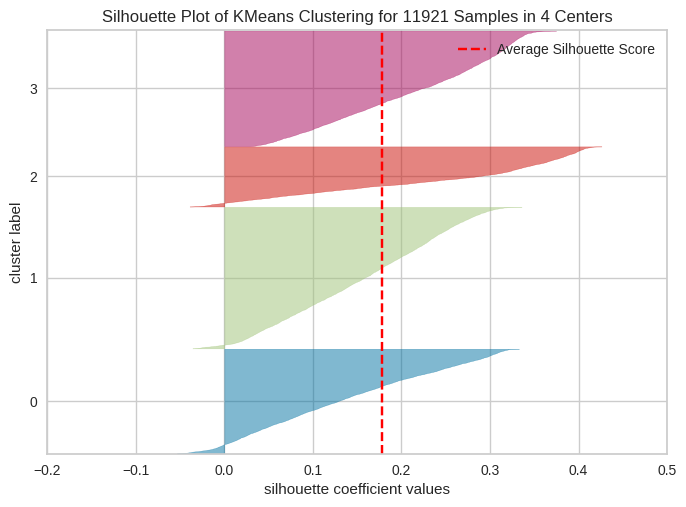

In [37]:
# plot silhouette
exp.plot_model(kmeans, plot = 'silhouette')

In [39]:
kmeans = exp.create_model('kmodes')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:08:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0716,1.1479,4.5293,0,0,0
